{'left ankle': [186.68544006347656, 139.48968505859375, 179.34388732910156],
 'left ear': [60.8300895690918, 140.53848266601562, 110.1234359741211],
 'left elbow': [86.00115966796875, 100.68428039550781, 216.05169677734375],
 'left eye': [60.8300895690918, 146.8312530517578, 145.78245544433594],
 'left hip': [138.44088745117188, 123.75776672363281, 192.97821044921875],
 'left knee': [137.39208984375, 135.2945098876953, 62.927677154541016],
 'left shoulder': [73.4156265258789, 130.050537109375, 76.56200408935547],
 'left wrist': [124.80656433105469, 83.90357208251953, 179.34388732910156],
 'nose': [66.07405853271484, 151.02642822265625, 93.34272003173828],
 'right ankle': [228.63722229003906, 71.31803131103516, 205.56375122070312],
 'right ear': [57.6837043762207, 152.07522583007812, 93.34272003173828],
 'right elbow': [84.95236206054688, 165.7095489501953, 31.463838577270508],
 'right eye': [60.8300895690918, 151.02642822265625, 93.34272003173828],
 'right hip': [139.48968505859375, 11

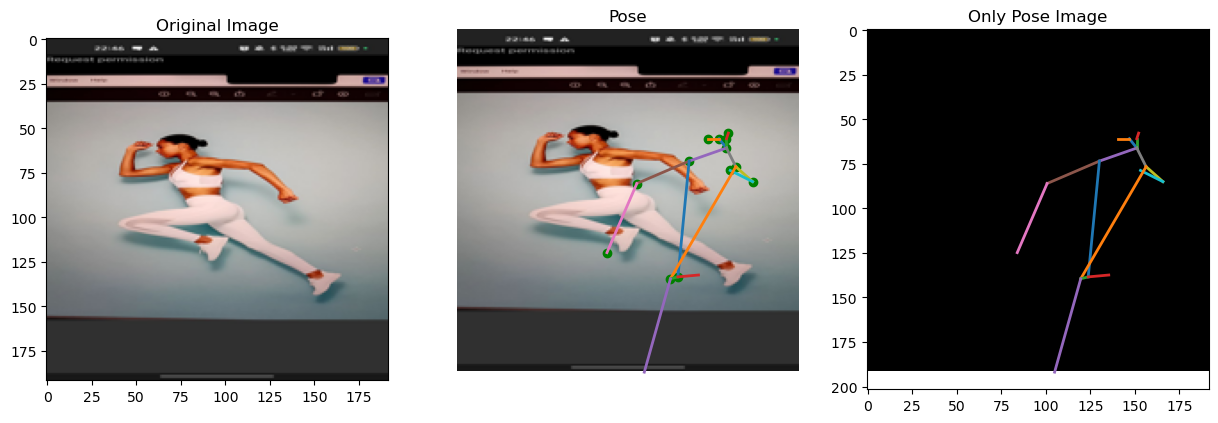

In [44]:
from PIL import Image
import json
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

# Load and resize the image
image_path = 'test_images.jpg'
resized_image_path = 'resized_image.jpg'
desired_size = (192, 192)

image = Image.open(image_path)
resized_image = image.resize(desired_size)
# resized_image.save(resized_image_path)

# Load the JSON file
json_path = 'test.json'

keypoints = [
    {
      "name": 'nose',
      "value": 0,
    },
    {
      "name": 'left eye',
      "value": 1,
    },
    {
      "name": 'right eye',
      "value": 2,
    },
    {
      "name": 'left ear',
      "value": 3,
    },
    {
      "name": 'right ear',
      "value": 4,
    },
    {
      "name": 'left shoulder',
      "value": 5,
    },
    {
      "name": 'right shoulder',
      "value": 6,
    },
    {
      "name": 'left elbow',
      "value": 7,
    },

    {
      "name": 'right elbow',
      "value": 8,
    },
    {
      "name": 'left wrist',
      "value": 9,
    },
    {
      "name": 'right wrist',
      "value": 10,
    },
    {
      "name": 'left hip',
      "value": 11,
    },
    {
      "name": 'right hip',
      "value": 12,
    },
    {
      "name": 'left knee',
      "value": 13,
    },
    {
      "name": 'right knee',
      "value": 14,
    },
    {
      "name": 'left ankle',
      "value": 15,
    },
    {
      "name": 'right ankle',
      "value": 16,
    },
  ]

mapping = {}
for i in keypoints:
    mapping[i['value']+1] = i['name']

with open(json_path, 'r') as json_file:
    data = json.load(json_file)

# # Use the loaded image and JSON data as needed
# # ...
# print(data)

# print(mapping)

# Convert the resized image to a numpy array
resized_image_array = np.array(resized_image)

# print(resized_image_array.shape)

lst_keypoints_dct = {}
for i in data:
    lst_keypoints_dct[mapping[int(i)]] = [data[i]['x'] * 256, data[i]['y'] * 256, data[i]['score'] * 256]

pprint(lst_keypoints_dct)
    


def make_pred(img, keypoints_dict, label):
  print(img.shape)
  plt.figure(figsize=(15, 5))
  plt.subplot(1, 3, 1)
  plt.title('Original Image')
  plt.imshow(img)
  plt.subplot(1, 3, 2)
  plt.imshow(img)
  plt.title('Pose')
  plt.axis('off')
  for i in range(13):
      plt.scatter(keypoints_dict[label[i]][1],keypoints_dict[label[i]][0],color='green')

  connections = [
      ('nose', 'left eye'), ('left eye', 'left ear'), ('nose', 'right eye'), ('right eye', 'right ear'),
      ('nose', 'left shoulder'), ('left shoulder', 'left elbow'), ('left elbow', 'left wrist'),
      ('nose', 'right shoulder'), ('right shoulder', 'right elbow'), ('right elbow', 'right wrist'),
      ('left shoulder', 'left hip'), ('right shoulder', 'right hip'), ('left hip', 'right hip'),
      ('left hip', 'left knee'), ('right hip', 'right knee')
  ]

  for start_key, end_key in connections:
      if start_key in keypoints_dict and end_key in keypoints_dict:
          start_point = keypoints_dict[start_key][:2]  # Take first two values
          end_point = keypoints_dict[end_key][:2]      # Take first two values
          plt.plot([start_point[1], end_point[1]], [start_point[0], end_point[0]], linewidth=2)
  
  plt.subplot(1, 3, 3)
  plt.imshow((img/255)/255)
  plt.title('Only Pose Image')
  for start_key, end_key in connections:
      if start_key in keypoints_dict and end_key in keypoints_dict:
          start_point = keypoints_dict[start_key][:2]  # Take first two values
          end_point = keypoints_dict[end_key][:2]      # Take first two values
          plt.plot([start_point[1], end_point[1]], [start_point[0], end_point[0]], linewidth=2)


label = ["nose", "left eye", "right eye", "left ear", "right ear", "left shoulder", "right shoulder", "left elbow", "right elbow", "left wrist", "right wrist", "left hip", "right hip", "left knee", "right knee", "left ankle", "right ankle"]

make_pred(resized_image_array, lst_keypoints_dct, label)

In [45]:
import tensorflow as tf
# import tensorflow_hub as hub
# from tensorflow_docs.vis import embed
import numpy as np
import cv2

# Import matplotlib libraries
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.patches as patches

# Some modules to display an animation using imageio.
import imageio
from IPython.display import HTML, display

# Dictionary that maps from joint names to keypoint indices.
KEYPOINT_DICT = {
    'nose': 0,
    'left_eye': 1,
    'right_eye': 2,
    'left_ear': 3,
    'right_ear': 4,
    'left_shoulder': 5,
    'right_shoulder': 6,
    'left_elbow': 7,
    'right_elbow': 8,
    'left_wrist': 9,
    'right_wrist': 10,
    'left_hip': 11,
    'right_hip': 12,
    'left_knee': 13,
    'right_knee': 14,
    'left_ankle': 15,
    'right_ankle': 16
}

# Maps bones to a matplotlib color name.
KEYPOINT_EDGE_INDS_TO_COLOR = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

def _keypoints_and_edges_for_display(keypoints_with_scores,
                                     height,
                                     width,
                                     keypoint_threshold=0):
  """Returns high confidence keypoints and edges for visualization.

  Args:
    keypoints_with_scores: A numpy array with shape [1, 1, 17, 3] representing
      the keypoint coordinates and scores returned from the MoveNet model.
    height: height of the image in pixels.
    width: width of the image in pixels.
    keypoint_threshold: minimum confidence score for a keypoint to be
      visualized.

  Returns:
    A (keypoints_xy, edges_xy, edge_colors) containing:
      * the coordinates of all keypoints of all detected entities;
      * the coordinates of all skeleton edges of all detected entities;
      * the colors in which the edges should be plotted.
  """
  keypoints_all = []
  keypoint_edges_all = []
  edge_colors = []
  num_instances, _, _, _ = keypoints_with_scores.shape
  for idx in range(num_instances):
    kpts_x = keypoints_with_scores[0, idx, :, 1]
    kpts_y = keypoints_with_scores[0, idx, :, 0]
    kpts_scores = keypoints_with_scores[0, idx, :, 2]
    kpts_absolute_xy = np.stack(
        [width * np.array(kpts_x), height * np.array(kpts_y)], axis=-1)
    kpts_above_thresh_absolute = kpts_absolute_xy[
        kpts_scores > keypoint_threshold, :]
    keypoints_all.append(kpts_above_thresh_absolute)

    for edge_pair, color in KEYPOINT_EDGE_INDS_TO_COLOR.items():
      if (kpts_scores[edge_pair[0]] > keypoint_threshold and
          kpts_scores[edge_pair[1]] > keypoint_threshold):
        x_start = kpts_absolute_xy[edge_pair[0], 0]
        y_start = kpts_absolute_xy[edge_pair[0], 1]
        x_end = kpts_absolute_xy[edge_pair[1], 0]
        y_end = kpts_absolute_xy[edge_pair[1], 1]
        line_seg = np.array([[x_start, y_start], [x_end, y_end]])
        keypoint_edges_all.append(line_seg)
        edge_colors.append(color)
  if keypoints_all:
    keypoints_xy = np.concatenate(keypoints_all, axis=0)
  else:
    keypoints_xy = np.zeros((0, 17, 2))

  if keypoint_edges_all:
    edges_xy = np.stack(keypoint_edges_all, axis=0)
  else:
    edges_xy = np.zeros((0, 2, 2))
  return keypoints_xy, edges_xy, edge_colors


def draw_prediction_on_image(
    image, keypoints_with_scores, crop_region=None, close_figure=False,
    output_image_height=None):
  """Draws the keypoint predictions on image.

  Args:
    image: A numpy array with shape [height, width, channel] representing the
      pixel values of the input image.
    keypoints_with_scores: A numpy array with shape [1, 1, 17, 3] representing
      the keypoint coordinates and scores returned from the MoveNet model.
    crop_region: A dictionary that defines the coordinates of the bounding box
      of the crop region in normalized coordinates (see the init_crop_region
      function below for more detail). If provided, this function will also
      draw the bounding box on the image.
    output_image_height: An integer indicating the height of the output image.
      Note that the image aspect ratio will be the same as the input image.

  Returns:
    A numpy array with shape [out_height, out_width, channel] representing the
    image overlaid with keypoint predictions.
  """
  height, width, channel = image.shape
  aspect_ratio = float(width) / height
  fig, ax = plt.subplots(figsize=(12 * aspect_ratio, 12))
  # To remove the huge white borders
  fig.tight_layout(pad=0)
  ax.margins(0)
  ax.set_yticklabels([])
  ax.set_xticklabels([])
  plt.axis('off')

  im = ax.imshow(image)
  line_segments = LineCollection([], linewidths=(4), linestyle='solid')
  ax.add_collection(line_segments)
  # Turn off tick labels
  scat = ax.scatter([], [], s=60, color='#FF1493', zorder=3)

  (keypoint_locs, keypoint_edges,
   edge_colors) = _keypoints_and_edges_for_display(
       keypoints_with_scores, height, width)

  line_segments.set_segments(keypoint_edges)
  line_segments.set_color(edge_colors)
  if keypoint_edges.shape[0]:
    line_segments.set_segments(keypoint_edges)
    line_segments.set_color(edge_colors)
  if keypoint_locs.shape[0]:
    scat.set_offsets(keypoint_locs)

  if crop_region is not None:
    xmin = max(crop_region['x_min'] * width, 0.0)
    ymin = max(crop_region['y_min'] * height, 0.0)
    rec_width = min(crop_region['x_max'], 0.99) * width - xmin
    rec_height = min(crop_region['y_max'], 0.99) * height - ymin
    rect = patches.Rectangle(
        (xmin,ymin),rec_width,rec_height,
        linewidth=1,edgecolor='b',facecolor='none')
    ax.add_patch(rect)

  fig.canvas.draw()
  image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
  image_from_plot = image_from_plot.reshape(
      fig.canvas.get_width_height()[::-1] + (3,))
  plt.close(fig)
  if output_image_height is not None:
    output_image_width = int(output_image_height / height * width)
    image_from_plot = cv2.resize(
        image_from_plot, dsize=(output_image_width, output_image_height),
         interpolation=cv2.INTER_CUBIC)
  return image_from_plot

def progress(value, max=100):
  return HTML("""
      <progress
          value='{value}'
          max='{max}',
          style='width: 100%'
      >
          {value}
      </progress>
  """.format(value=value, max=max))

In [52]:
import numpy as np
tmp = []
for i in data:
    tmp.append([data[i]['x'], data[i]['y'], data[i]['score']])
    
tmp = np.array(tmp).reshape(1, 1, 17, 3)


In [53]:
tmp

array([[[[0.25810179, 0.58994699, 0.36462   ],
         [0.23761754, 0.57355958, 0.56946272],
         [0.23761754, 0.58994699, 0.36462   ],
         [0.23761754, 0.54897845, 0.43016967],
         [0.22532697, 0.59404385, 0.36462   ],
         [0.28677979, 0.50800991, 0.29907033],
         [0.29907033, 0.61043125, 0.43016967],
         [0.33594203, 0.39329797, 0.84395194],
         [0.33184516, 0.64730293, 0.12290562],
         [0.48752564, 0.32774833, 0.70056206],
         [0.30726406, 0.59814066, 0.24581124],
         [0.54078472, 0.48342878, 0.75382113],
         [0.54488158, 0.46704134, 0.70056206],
         [0.53668785, 0.52849418, 0.24581124],
         [0.74972427, 0.4096854 , 0.49981618],
         [0.72924   , 0.54488158, 0.70056206],
         [0.89311415, 0.27858606, 0.8029834 ]]]])

In [59]:
# Load the input image.
image_path = 'test_images.jpg'
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image)
image = tf.image.flip_left_right(image)


In [60]:
# Resize and pad the image to keep the aspect ratio and fit the expected size.
input_size = 192
input_image = tf.expand_dims(image, axis=0)
input_image = tf.image.resize_with_pad(input_image, input_size, input_size)

# Visualize the predictions with image.
display_image = tf.expand_dims(image, axis=0)
display_image = tf.cast(tf.image.resize_with_pad(
    display_image, 1280, 1280), dtype=tf.int32)

/var/folders/ts/v5l9s_495xgg5t52hsd001q80000gn/T/ipykernel_22280/1445382317.py:175: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


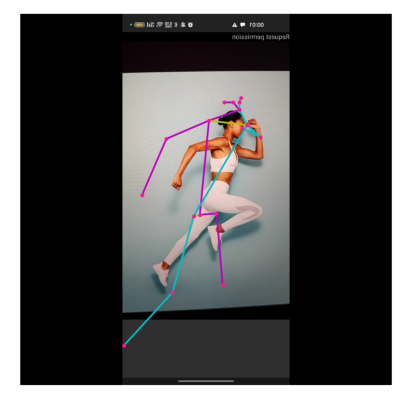

In [61]:
output_overlay = draw_prediction_on_image(
    np.squeeze(display_image.numpy(), axis=0), tmp)

plt.figure(figsize=(5, 5))
plt.imshow(output_overlay)
_ = plt.axis('off')

In [41]:
display_image.numpy().shape

(1, 1280, 1280, 3)

In [40]:
tmp

array([[[[0.70926499, 0.16120756, 0.02046583],
         [0.69708008, 0.18367654, 0.00841264],
         [0.53775519, 0.61022818, 0.00449264],
         [0.53755116, 0.42397571, 0.00350785],
         [0.45667851, 0.54488009, 0.00416544],
         [0.54406929, 0.33681187, 0.00975404],
         [0.4246738 , 0.58123016, 0.0080138 ],
         [0.41961068, 0.68906492, 0.00762002],
         [0.46631762, 0.60732067, 0.0467331 ],
         [0.56627464, 0.69167101, 0.00494307],
         [0.66371804, 0.36190462, 0.00662965],
         [0.53386605, 0.60916376, 0.02590163],
         [0.55876064, 0.43161148, 0.03109163],
         [0.57636452, 0.54973036, 0.01875005],
         [0.56774014, 0.40854156, 0.0165526 ],
         [0.64357102, 0.97124505, 0.01808489],
         [0.63777435, 0.97450918, 0.01747453]]]])